In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

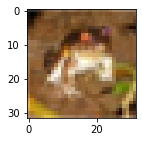

In [8]:
plot_sample(X_train, y_train, 0)

TypeError: only integer scalar arrays can be converted to a scalar index

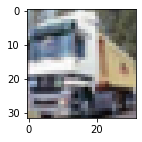

In [9]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.8166 - accuracy: 0.35390s - loss: 1.8
Epoch 2/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6252 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5433 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4836 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4349 - accuracy: 0.4946


CNN MODEL

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5253 - accuracy: 0.4504
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1545 - accuracy: 0.5936
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0279 - accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9459 - accuracy: 0.6710
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8927 - accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8427 - accuracy: 0.7081
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7962 - accuracy: 0.7251
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7565 - accuracy: 0.74020s - loss: 0.7563 - accuracy
Epoch 9/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7265 - accuracy: 0.74670s - loss: 0.7264 
Epoch 10/10
1563/1

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy.

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9159 - accuracy: 0.6906


[0.9159485101699829, 0.6905999779701233]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.9210080e-04, 4.1747057e-06, 2.9282121e-03, 9.2390752e-01,
        9.9020646e-05, 2.2313936e-02, 4.2147338e-02, 7.7012664e-06,
        7.6918313e-03, 8.1273811e-06],
       [3.6257687e-03, 9.5150955e-03, 3.8659982e-06, 3.9108807e-07,
        9.9984049e-08, 1.4755743e-09, 1.8142053e-09, 1.3255914e-08,
        9.8678106e-01, 7.3784780e-05],
       [6.9304794e-02, 5.2860975e-01, 7.9130558e-03, 1.6114619e-02,
        3.5192285e-04, 3.4164355e-04, 7.6306882e-05, 1.6432087e-03,
        3.3150515e-01, 4.4139519e-02],
       [8.8954341e-01, 4.8961084e-02, 1.0674031e-02, 2.1222704e-03,
        5.3727732e-04, 1.6085191e-05, 1.0324887e-04, 5.7574500e-05,
        4.7371827e-02, 6.1314838e-04],
       [4.8277743e-06, 2.0619365e-05, 1.7568516e-02, 6.4690307e-02,
        3.6533815e-01, 2.1227533e-02, 5.3092384e-01, 1.4700063e-05,
        2.0384547e-04, 7.6302358e-06]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

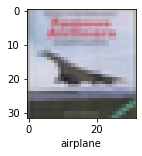

In [19]:
plot_sample(X_test, y_test,3)

In [20]:
classes[y_classes[3]]

'airplane'

In [21]:
classes[y_classes[3]]

'airplane'